<a href="https://colab.research.google.com/github/AnalyticalHarry/FutureAndOption/blob/main/VOLATILITY_%26_GREEKS_NVIDIA_OPTION_(14_JUNE_EXPIRATION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VOLATILITY & GREEKS: NVIDIA OPTION (14 JUNE EXPIRATION)**

### **Hemant Thapa**

In [1]:
#loading library
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import norm

In [2]:
# loading 14 June Expiration spread for Nvidia
df = pd.read_csv('/content/nvda-volatility-greeks-exp-2024-06-14.csv')

In [3]:
df[:10]

,Strike,Last,Theor.,IV,Delta,Gamma,Theta,Vega,Rho,Volume,Open Int,Vol/OI,Type,Last Trade,Avg IV
0,260,937.29,950.90,543.85%,0.99467,0.00002,-1.11190,0.02373,0.04135,5,2,2.50,Call,06/07/2024,57.49%
1,280,932.35,930.75,511.25%,0.99477,0.00002,-1.03336,0.02333,0.04468,5,0,0.00,Call,06/07/2024,57.49%
2,290,922.40,920.75,498.94%,0.99465,0.00002,-1.03007,0.02380,0.04630,5,0,0.00,Call,06/07/2024,57.49%
3,300,904.55,910.75,487.08%,0.99454,0.00002,-1.02667,0.02426,0.04792,2,2,1.00,Call,06/07/2024,57.49%
4,310,0.00,900.85,479.60%,0.99416,0.00002,-1.07182,0.02573,0.04948,0,0,0.00,Call,NaN,57.49%
5,320,755.09,890.85,468.47%,0.99404,0.00002,-1.06823,0.02621,0.05109,0,1,0.00,Call,05/31/24,57.49%
6,330,874.95,880.80,455.81%,0.99405,0.00002,-1.04028,0.02617,0.05275,1,20,0.05,Call,06/07/2024,57.49%
7,340,0.00,870.90,449.10%,0.99365,0.00003,-1.08486,0.02771,0.05430,0,0,0.00,Call,NaN,57.49%
8,350,838.62,860.60,427.65%,0.99439,0.00002,-0.93367,0.02481,0.05614,1,5,0.20,Call,06/07/2024,57.49%
9,360,840.00,850.75,423.75%,0.99383,0.00003,-1.00420,0.02700,0.05765,0,0,0.00,Call,06/05/2024,57.49%


In [4]:
# drop all NaN rows
df.dropna(inplace=True)

In [5]:
# total null values
df.isnull().sum()

Strike        0
Last          0
Theor.        0
IV            0
Delta         0
Gamma         0
Theta         0
Vega          0
Rho           0
Volume        0
Open Int      0
Vol/OI        0
Type          0
Last Trade    0
Avg IV        0
dtype: int64

In [6]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 0 to 475
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Strike      455 non-null    object 
 1   Last        455 non-null    float64
 2   Theor.      455 non-null    float64
 3   IV          455 non-null    object 
 4   Delta       455 non-null    float64
 5   Gamma       455 non-null    float64
 6   Theta       455 non-null    float64
 7   Vega        455 non-null    float64
 8   Rho         455 non-null    float64
 9   Volume      455 non-null    object 
 10  Open Int    455 non-null    object 
 11  Vol/OI      455 non-null    float64
 12  Type        455 non-null    object 
 13  Last Trade  455 non-null    object 
 14  Avg IV      455 non-null    object 
dtypes: float64(8), object(7)
memory usage: 56.9+ KB


In [7]:
# spliting data frame into call and put option
call = df[df['Type'] == 'Call']
put = df[df['Type'] == 'Put']

In [8]:
# functions for option geeks
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

def call_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

def call_theta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    return theta / 365

def call_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    return vega / 100

def call_rho(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    return rho / 100

In [9]:
S = 1208                                # Current stock price
K = 1210                                # Strike price
T = 7 / 365                             # Time to expiration (in years, converted from days)
r = 2.13/100                            # Risk-free interest rate (US Real Interest Rate)
implied_volatility_value = 0.57         # Implied volatility (converted from percentage)
historic_volatility_value = 0.47        # Historic volatility (converted from percentage)

In [10]:
#solving Greeks values using volatility
def volatility(S, K, T, r, sigma):
    call_delta_value = call_delta(S, K, T, r, sigma)
    call_gamma_value = call_gamma(S, K, T, r, sigma)
    call_theta_value = call_theta(S, K, T, r, sigma)
    call_vega_value = call_vega(S, K, T, r, sigma)
    call_rho_value = call_rho(S, K, T, r, sigma)

    print(f"Call Delta: {call_delta_value:.2f}")
    print(f"Call Gamma: {call_gamma_value:.2f}")
    print(f"Call Theta: {call_theta_value:.2f}")
    print(f"Call Vega: {call_vega_value:.2f}")
    print(f"Call Rho: {call_rho_value:.2f}")

In [11]:
# volatility rate 0.57
volatility(S, K, T, r, implied_volatility_value)

Call Delta: 0.51
Call Gamma: 0.00
Call Theta: -2.75
Call Vega: 0.67
Call Rho: 0.11


In [12]:
# volatility rate 0.47
volatility(S, K, T, r, historic_volatility_value)

Call Delta: 0.51
Call Gamma: 0.01
Call Theta: -2.27
Call Vega: 0.67
Call Rho: 0.11


In [13]:
# check rows between 150 - 160
call.iloc[153:160]

,Strike,Last,Theor.,IV,Delta,Gamma,Theta,Vega,Rho,Volume,Open Int,Vol/OI,Type,Last Trade,Avg IV
162,"1,210.00",35.56,35.56,57.58%,0.51444,0.00447,-3.05001,0.61790,0.09638,"10,653","2,252",4.73,Call,06/07/2024,57.49%
163,"1,215.00",33.13,33.13,57.47%,0.49209,0.00448,-3.04256,0.61818,0.09234,"4,725","1,548",3.05,Call,06/07/2024,57.49%
164,"1,220.00",31.00,31.00,57.68%,0.47009,0.00445,-3.04179,0.61656,0.08832,"7,516","2,902",2.59,Call,06/07/2024,57.49%
165,"1,225.00",28.75,28.75,57.51%,0.44790,0.00444,-3.01266,0.61302,0.08428,"3,379","1,445",2.34,Call,06/07/2024,57.49%
166,"1,230.00",26.81,26.81,57.67%,0.42643,0.00439,-2.99218,0.60776,0.08033,"3,300","3,328",0.99,Call,06/07/2024,57.49%
167,"1,235.00",24.82,24.82,57.58%,0.40483,0.00434,-2.94972,0.60063,0.07637,"1,586","1,008",1.57,Call,06/07/2024,57.49%
168,"1,240.00",23.10,23.10,57.77%,0.38422,0.00427,-2.91443,0.59208,0.07256,"3,632","2,448",1.48,Call,06/07/2024,57.49%


In [14]:
# calling function to calculate geeks of row 150 -160
for i in call.iloc[153:160]['Strike']:
    volatility(S, K, T, r, implied_volatility_value)
    print()

Call Delta: 0.51
Call Gamma: 0.00
Call Theta: -2.75
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.00
Call Theta: -2.75
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.00
Call Theta: -2.75
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.00
Call Theta: -2.75
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.00
Call Theta: -2.75
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.00
Call Theta: -2.75
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.00
Call Theta: -2.75
Call Vega: 0.67
Call Rho: 0.11



In [15]:
# calling function to calculate geeks of row 150 -160
for i in call.iloc[153:160]['Strike']:
    volatility(S, K, T, r, historic_volatility_value)
    print()

Call Delta: 0.51
Call Gamma: 0.01
Call Theta: -2.27
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.01
Call Theta: -2.27
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.01
Call Theta: -2.27
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.01
Call Theta: -2.27
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.01
Call Theta: -2.27
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.01
Call Theta: -2.27
Call Vega: 0.67
Call Rho: 0.11

Call Delta: 0.51
Call Gamma: 0.01
Call Theta: -2.27
Call Vega: 0.67
Call Rho: 0.11



# **Strike Price vs Delta**

In [16]:
def strikePriceVsDelta(df, x_col, y_col, x_label, y_label, title):
    if df[x_col].dtype == object:
        df[x_col] = df[x_col].str.replace(',', '').astype(float)

    plt.figure(figsize=(12, 6))
    plt.style.use('dark_background')

    x = df[x_col]
    y = df[y_col].values

    # y values
    plt.stackplot(x, y, labels=[y_label], colors=['cyan'], baseline='zero', edgecolor='black', linewidth=0.5, alpha=0.5)

    plt.xlabel(x_label, fontsize=12, color='white')
    plt.ylabel(y_label, fontsize=12, color='white')
    plt.title(title, fontsize=14, color='white')

    # labels for better visibility
    num_xticks = 10
    x_ticks = np.linspace(df[x_col].min(), df[x_col].max(), num_xticks)
    x_tick_labels = [f"{int(x)}" for x in x_ticks]
    plt.xticks(x_ticks, x_tick_labels, fontsize=10, rotation=45, color='white')

    y_min, y_max = df[y_col].min(), df[y_col].max()
    y_ticks = np.linspace(y_min, y_max, num=10)
    plt.yticks(y_ticks, fontsize=10, color='white')

    ax = plt.gca()
    ax.spines['bottom'].set_color('none')
    ax.tick_params(axis='x', which='both', length=0)
    plt.grid(True, linestyle='--', alpha=0.3, color='gray')
    plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='red')
    plt.tight_layout()
    plt.show()


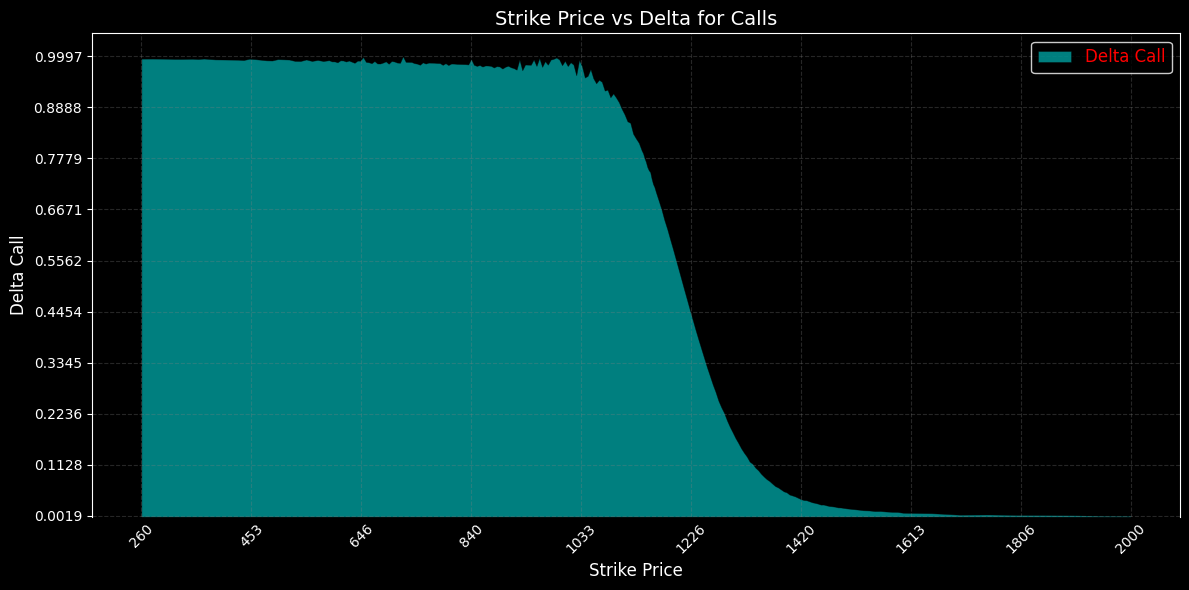

In [18]:
strikePriceVsDelta(call, 'Strike', 'Delta', 'Strike Price', 'Delta Call', 'Strike Price vs Delta for Calls')

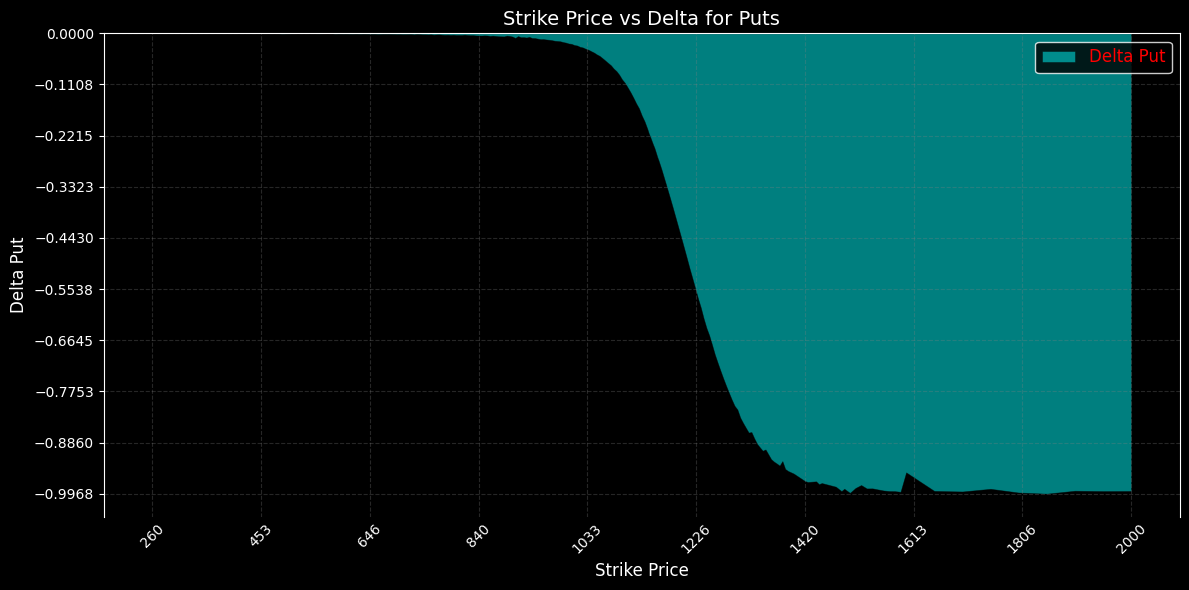

In [19]:
strikePriceVsDelta(put, 'Strike', 'Delta', 'Strike Price', 'Delta Put', 'Strike Price vs Delta for Puts')

# **Strike Price vs Gamma**

In [20]:
def strikePriceVsGamma(df, x_col, y_col, x_label, y_label, title):
    if df[x_col].dtype == object:
        df[x_col] = df[x_col].str.replace(',', '').astype(float)

    plt.figure(figsize=(12, 6))
    plt.style.use('dark_background')

    x = df[x_col]
    y = df[y_col].values

    # y values
    plt.stackplot(x, y, labels=[y_label], colors=['red'], baseline='zero', edgecolor='black', linewidth=0.5)

    plt.xlabel(x_label, fontsize=12, color='white')
    plt.ylabel(y_label, fontsize=12, color='white')
    plt.title(title, fontsize=14, color='white')

    # labels for better visibility
    num_xticks = 10
    x_ticks = np.linspace(df[x_col].min(), df[x_col].max(), num_xticks)
    x_tick_labels = [f"{int(x)}" for x in x_ticks]
    plt.xticks(x_ticks, x_tick_labels, fontsize=10, rotation=45, color='white')

    y_min, y_max = df[y_col].min(), df[y_col].max()
    y_ticks = np.linspace(y_min, y_max, num=10)
    plt.yticks(y_ticks, fontsize=10, color='white')

    ax = plt.gca()
    ax.spines['bottom'].set_color('none')
    ax.tick_params(axis='x', which='both', length=0)
    plt.grid(True, linestyle='--', alpha=0.3, color='gray')
    plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
    plt.tight_layout()
    plt.show()


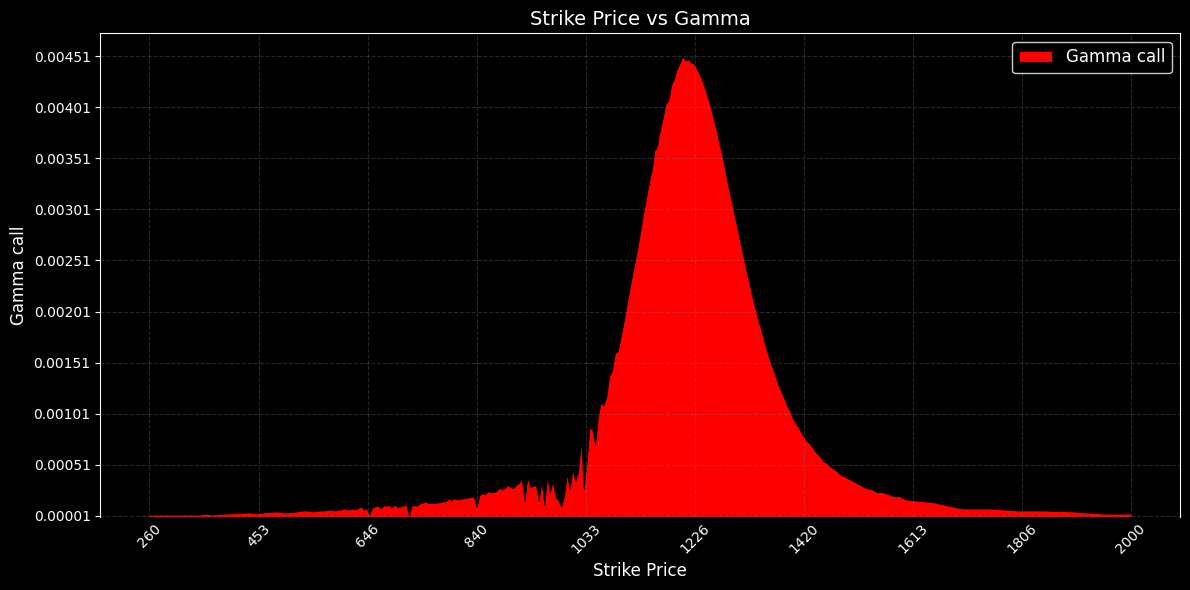

In [21]:
strikePriceVsGamma(call, 'Strike', 'Gamma', 'Strike Price', 'Gamma call', 'Strike Price vs Gamma')

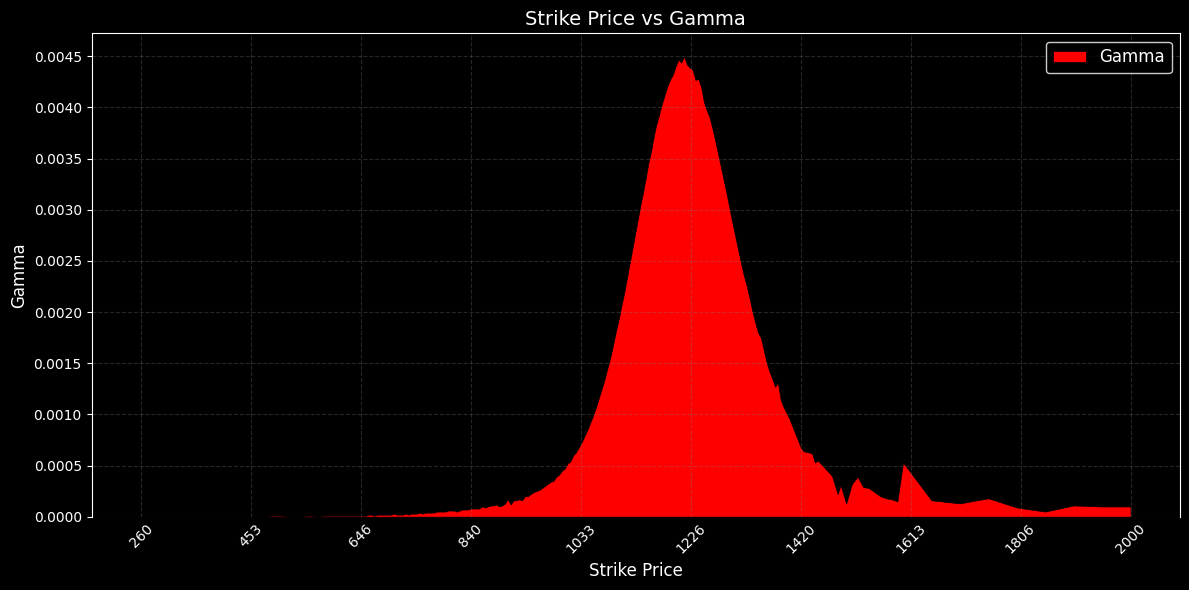

In [22]:
strikePriceVsGamma(put, 'Strike', 'Gamma', 'Strike Price', 'Gamma', 'Strike Price vs Gamma')

# **Strike Price vs Theta**

In [23]:
def strikePriceVsTheta(df, x_col, y_col, x_label, y_label, title):
    if df[x_col].dtype == object:
        df[x_col] = df[x_col].str.replace(',', '').astype(float)

    plt.figure(figsize=(12, 6))
    plt.style.use('dark_background')
    df_sorted = df.sort_values(by=x_col)

    x = df_sorted[x_col]

    y = df_sorted[y_col].values
    y = np.array(y).reshape(1, -1)
    plt.stackplot(x, y, labels=[y_label], colors=['green'], baseline='zero', edgecolor='black', linewidth=0.5)

    plt.xlabel(x_label, fontsize=12, color='white')
    plt.ylabel(y_label, fontsize=12, color='white')
    plt.title(title, fontsize=14, color='white')
    num_xticks = 10
    x_ticks = np.linspace(df[x_col].min(), df[x_col].max(), num_xticks)
    x_tick_labels = [f"{int(x)}" for x in x_ticks]
    plt.xticks(x_ticks, x_tick_labels, fontsize=10, rotation=45, color='white')

    y_min, y_max = df[y_col].min(), df[y_col].max()
    y_ticks = np.linspace(y_min, y_max, num=10)
    plt.yticks(y_ticks, fontsize=10, color='white')

    ax = plt.gca()
    ax.spines['bottom'].set_color('none')
    ax.tick_params(axis='x', which='both', length=0)
    plt.grid(True, linestyle='--', alpha=0.3, color='gray')
    plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
    plt.tight_layout()
    plt.show()


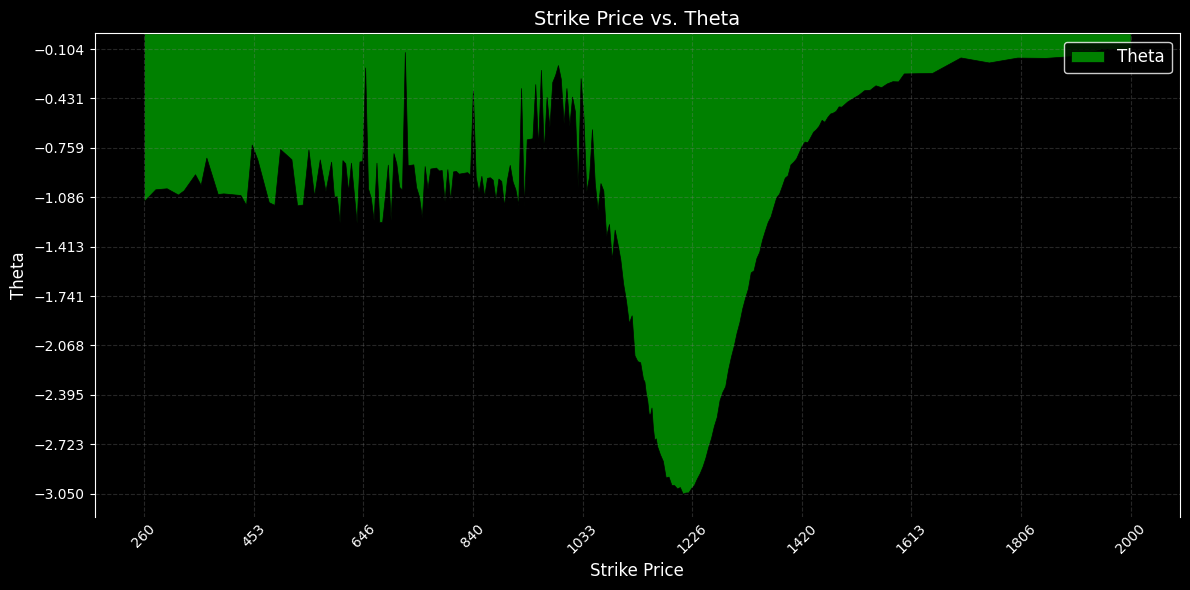

In [24]:
strikePriceVsTheta(df=call,
                   x_col='Strike',
                   y_col='Theta',
                   x_label='Strike Price',
                   y_label='Theta',
                   title='Strike Price vs. Theta')

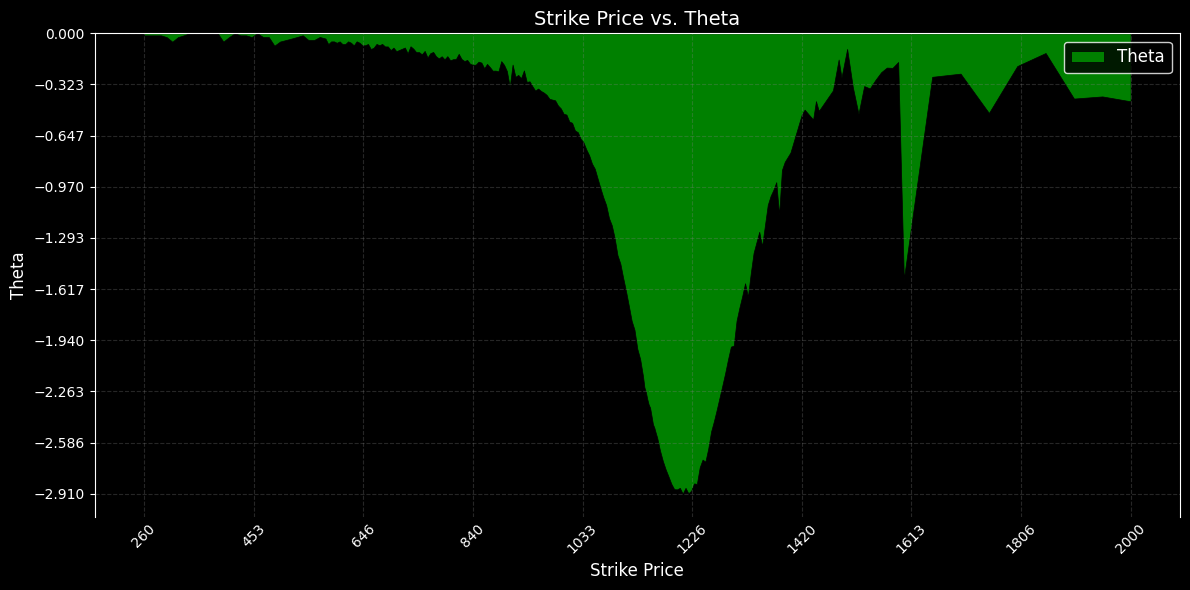

In [25]:
strikePriceVsTheta(df=put,
                   x_col='Strike',
                   y_col='Theta',
                   x_label='Strike Price',
                   y_label='Theta',
                   title='Strike Price vs. Theta')

# **Strike Price vs Vega**

In [26]:
def StrikePriceVsVega(df, x_col, y_col, x_label, y_label, title):
    if df[x_col].dtype == object:
        df[x_col] = df[x_col].str.replace(',', '').astype(float)

    plt.figure(figsize=(12, 6))
    plt.style.use('dark_background')

    x = df[x_col]
    y = df[y_col].values

    # y values
    plt.stackplot(x, y, labels=[y_label], colors=['orange'], baseline='zero', edgecolor='black', linewidth=0.5)

    plt.xlabel(x_label, fontsize=12, color='white')
    plt.ylabel(y_label, fontsize=12, color='white')
    plt.title(title, fontsize=14, color='white')

    # labels for better visibility
    num_xticks = 10
    x_ticks = np.linspace(df[x_col].min(), df[x_col].max(), num_xticks)
    x_tick_labels = [f"{int(x)}" for x in x_ticks]
    plt.xticks(x_ticks, x_tick_labels, fontsize=10, rotation=45, color='white')

    # color for visibility
    y_min, y_max = df[y_col].min(), df[y_col].max()
    y_ticks = np.linspace(y_min, y_max, num=10)
    plt.yticks(y_ticks, fontsize=10, color='white')

    ax = plt.gca()
    ax.spines['bottom'].set_color('none')
    ax.tick_params(axis='x', which='both', length=0)
    plt.grid(True, linestyle='--', alpha=0.3, color='gray')
    plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
    plt.tight_layout()
    plt.show()

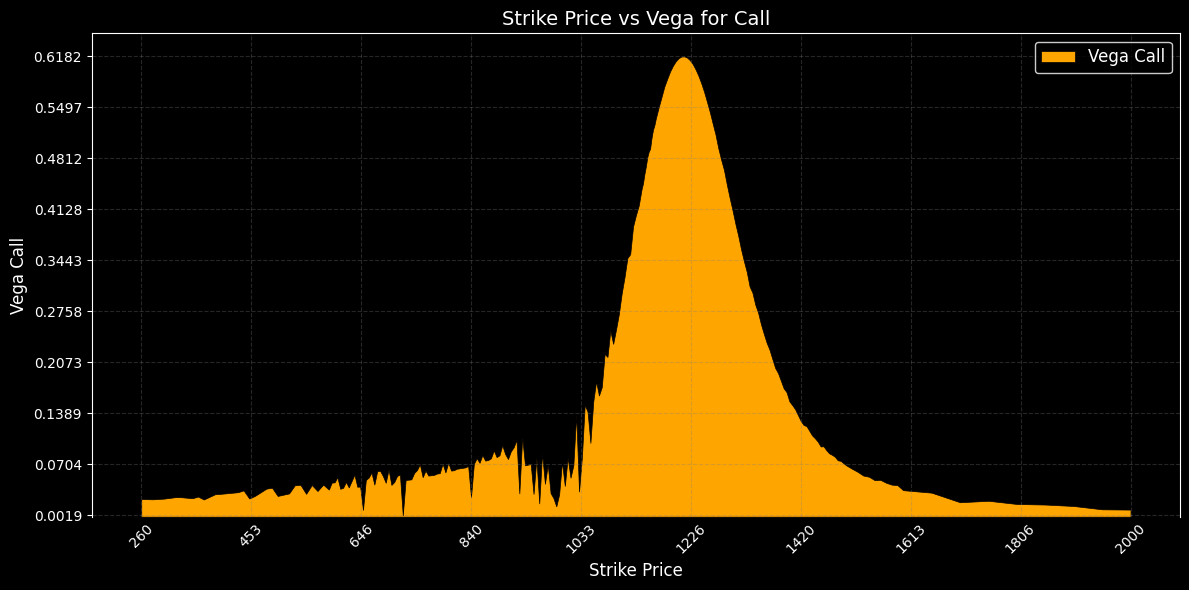

In [27]:
StrikePriceVsVega(call, 'Strike', 'Vega', 'Strike Price', 'Vega Call', 'Strike Price vs Vega for Call')

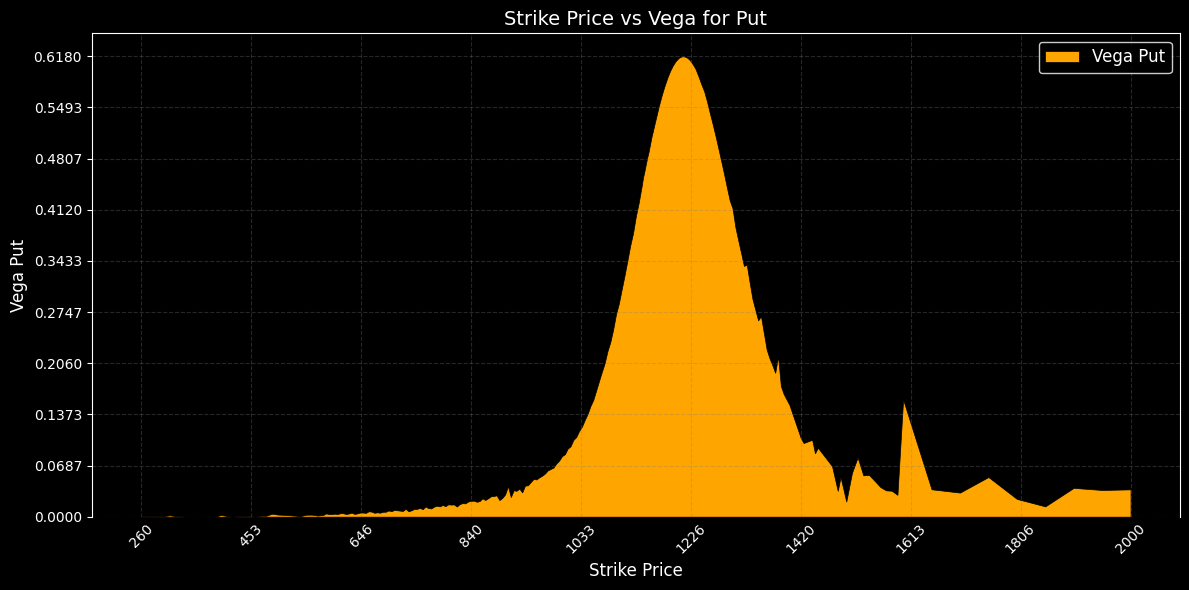

In [28]:
StrikePriceVsVega(put, 'Strike', 'Vega', 'Strike Price', 'Vega Put', 'Strike Price vs Vega for Put')

# **Strike Price vs Rho**

In [29]:
def strikePriceVsRho(df, x_col, y_col, x_label, y_label, title):
    if df[x_col].dtype == object:
        df[x_col] = df[x_col].str.replace(',', '').astype(float)

    plt.figure(figsize=(12, 6))
    plt.style.use('dark_background')

    x = df[x_col]
    y = df[y_col].values

    plt.stackplot(x, y, labels=[y_label], colors=['yellow'], baseline='zero', edgecolor='black', linewidth=0.5)

    plt.xlabel(x_label, fontsize=12, color='white')
    plt.ylabel(y_label, fontsize=12, color='white')
    plt.title(title, fontsize=14, color='white')

    num_xticks = 10
    x_ticks = np.linspace(df[x_col].min(), df[x_col].max(), num_xticks)
    x_tick_labels = [f"{int(x)}" for x in x_ticks]
    plt.xticks(x_ticks, x_tick_labels, fontsize=10, rotation=45, color='white')

    y_min, y_max = df[y_col].min(), df[y_col].max()
    y_ticks = np.linspace(y_min, y_max, num=10)
    plt.yticks(y_ticks, fontsize=10, color='white')

    ax = plt.gca()
    ax.spines['bottom'].set_color('none')
    ax.tick_params(axis='x', which='both', length=0)
    plt.grid(True, linestyle='--', alpha=0.3, color='gray')
    plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='red')
    plt.tight_layout()
    plt.show()

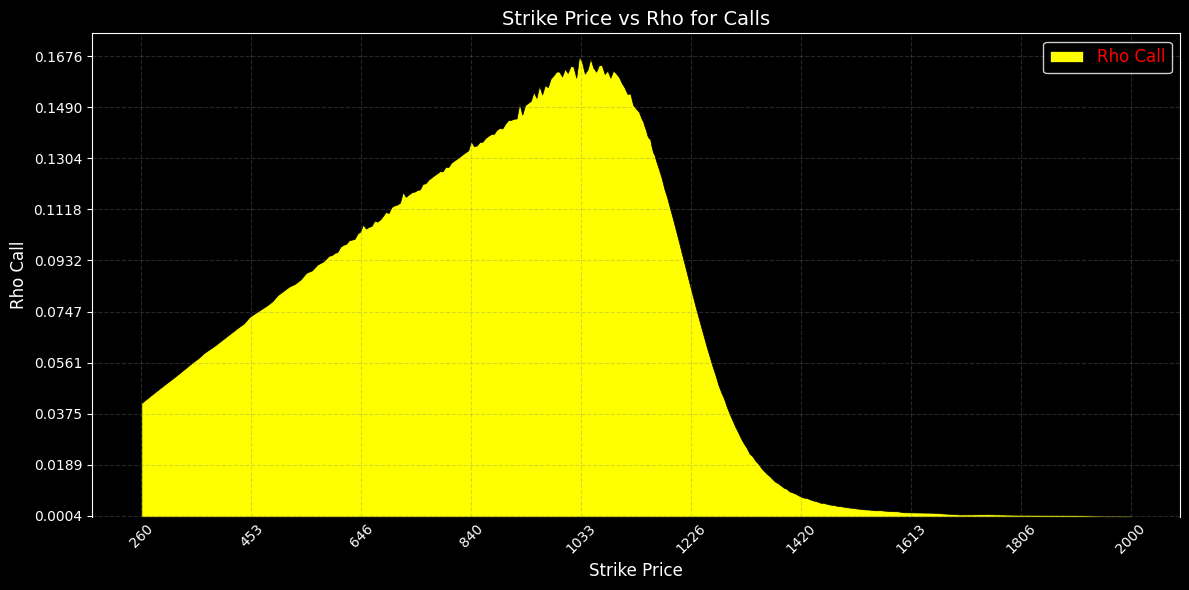

In [30]:
strikePriceVsRho(call, 'Strike', 'Rho', 'Strike Price', 'Rho Call', 'Strike Price vs Rho for Calls')

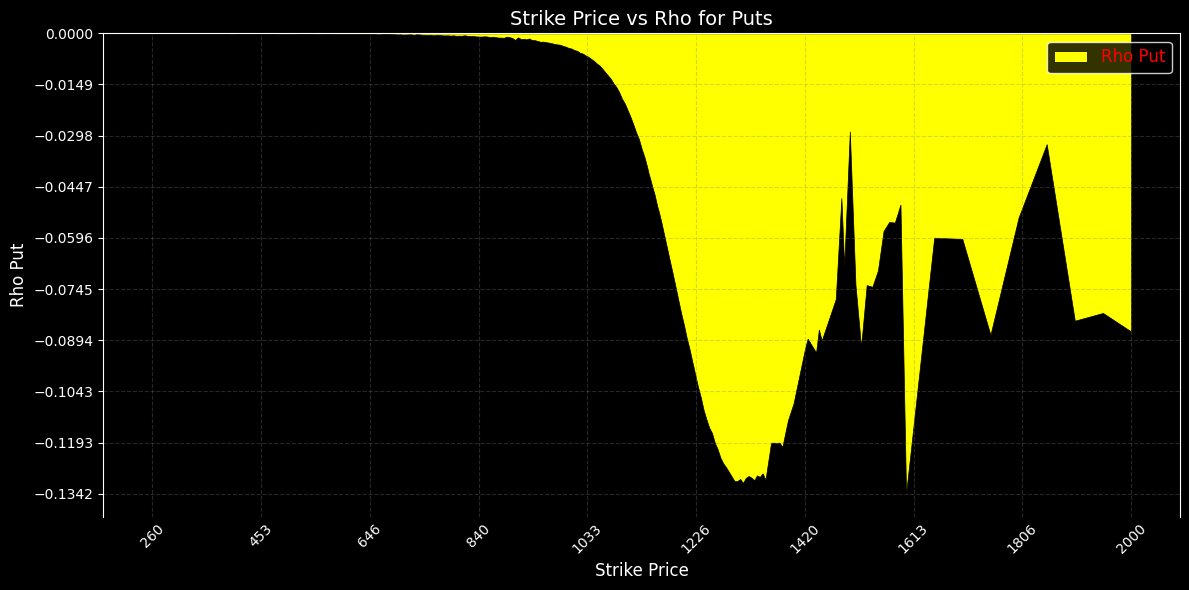

In [31]:
strikePriceVsRho(put, 'Strike', 'Rho', 'Strike Price', 'Rho Put', 'Strike Price vs Rho for Puts')

# **Option Greeks**

In [32]:
def greeks(df, greek_labels):
    plt.figure(figsize=(12, 6))
    plt.style.use('dark_background')

    for greek_label in greek_labels:
        plt.plot(df['Strike'], df[greek_label], label=greek_label)

    plt.xlabel('Strike Price', fontsize=12, color='white')
    plt.ylabel('Value', fontsize=12, color='white')
    plt.title('Strike Price vs Greeks', fontsize=14, color='white')
    plt.grid(True, linestyle='--', alpha=0.3, color='gray')
    plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
    plt.tight_layout()
    plt.show()

greek_variables = ['Delta', 'Theta', 'Gamma', 'Vega', 'Rho']

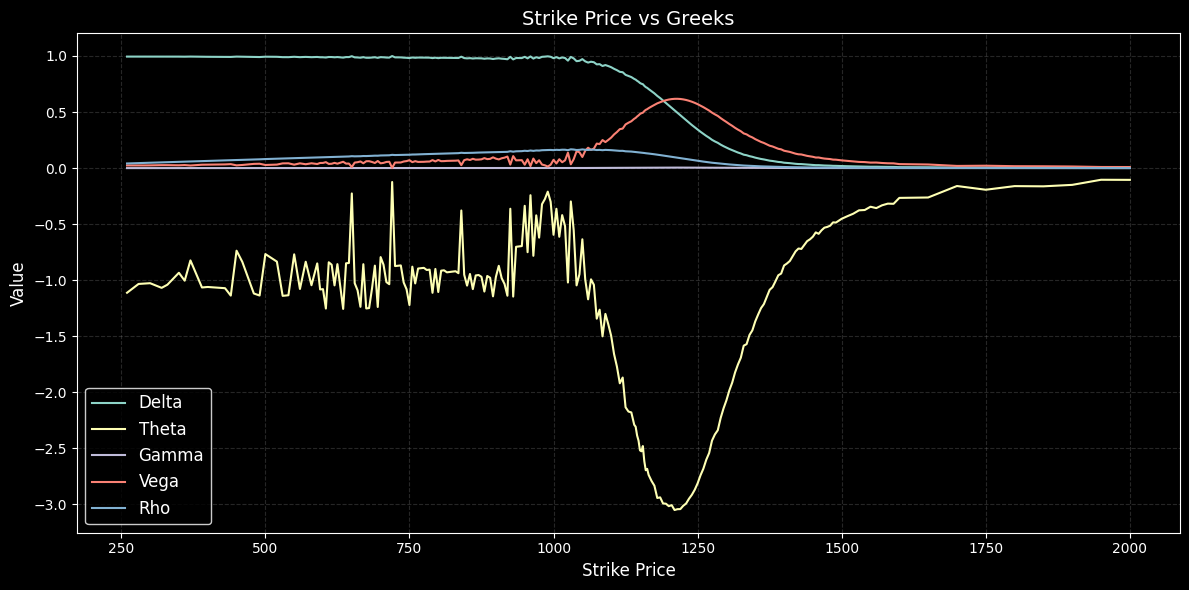

In [33]:
# call option
greeks(call, greek_variables)

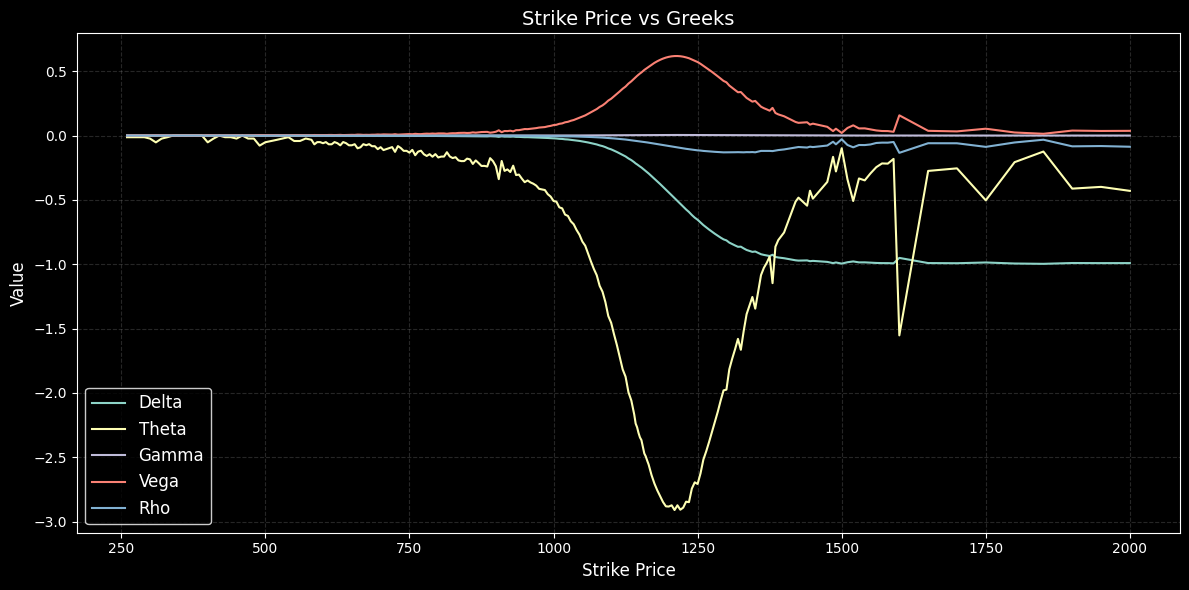

In [34]:
# put option
greeks(put, greek_variables)

# **Correaltion analysis on Greeks**

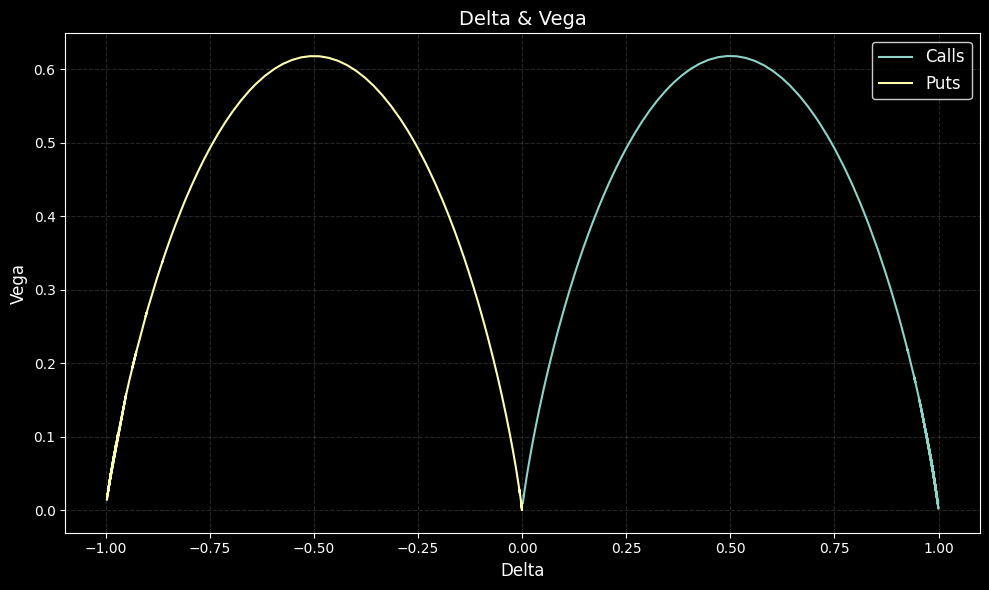

In [35]:
# Delta and Vega
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.plot(call['Delta'], call['Vega'], label='Calls')
plt.plot(put['Delta'], put['Vega'], label='Puts')
plt.xlabel('Delta', fontsize=12, color='white')
plt.ylabel('Vega', fontsize=12, color='white')
plt.title('Delta & Vega', fontsize=14, color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()

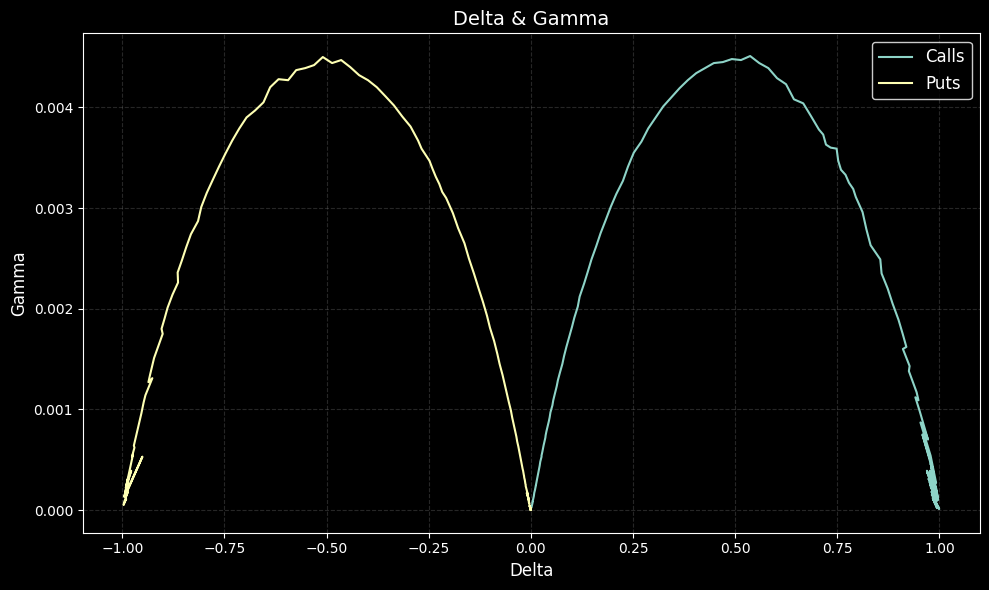

In [36]:
# Delta and Gamma
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.plot(call['Delta'], call['Gamma'], label='Calls')
plt.plot(put['Delta'], put['Gamma'], label='Puts')
plt.xlabel('Delta', fontsize=12, color='white')
plt.ylabel('Gamma', fontsize=12, color='white')
plt.title('Delta & Gamma', fontsize=14, color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()

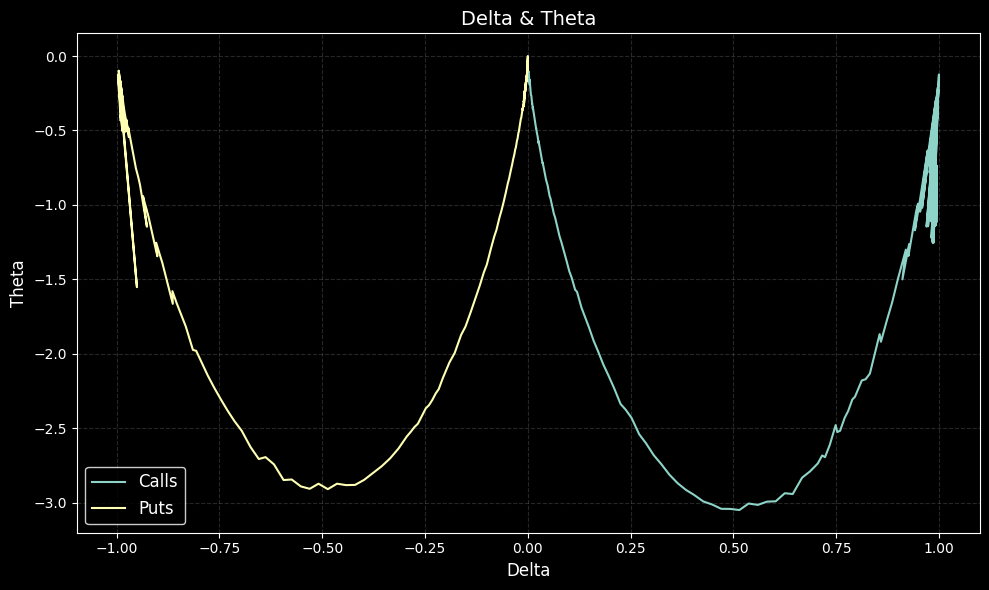

In [37]:
# Delta and Theta
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.plot(call['Delta'], call['Theta'], label='Calls')
plt.plot(put['Delta'], put['Theta'], label='Puts')
plt.xlabel('Delta', fontsize=12, color='white')
plt.ylabel('Theta', fontsize=12, color='white')
plt.title('Delta & Theta', fontsize=14, color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()

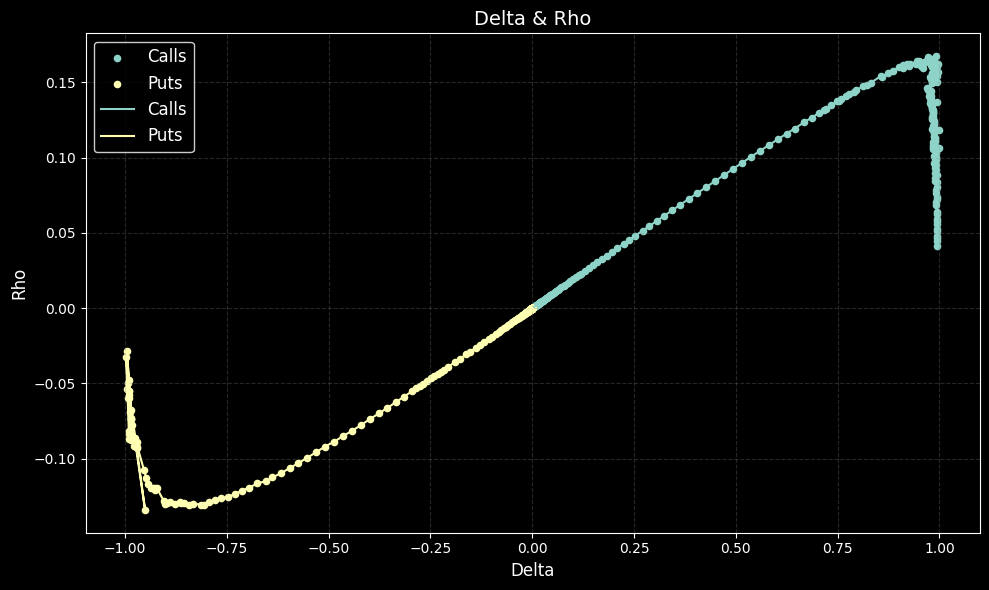

In [38]:
# Delta and Rho
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.scatter(call['Delta'], call['Rho'], label='Calls', s=20)
plt.scatter(put['Delta'], put['Rho'], label='Puts', s=20)
plt.plot(call['Delta'], call['Rho'], label='Calls')
plt.plot(put['Delta'], put['Rho'], label='Puts')
plt.xlabel('Delta', fontsize=12, color='white')
plt.ylabel('Rho', fontsize=12, color='white')
plt.title('Delta & Rho', fontsize=14, color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()

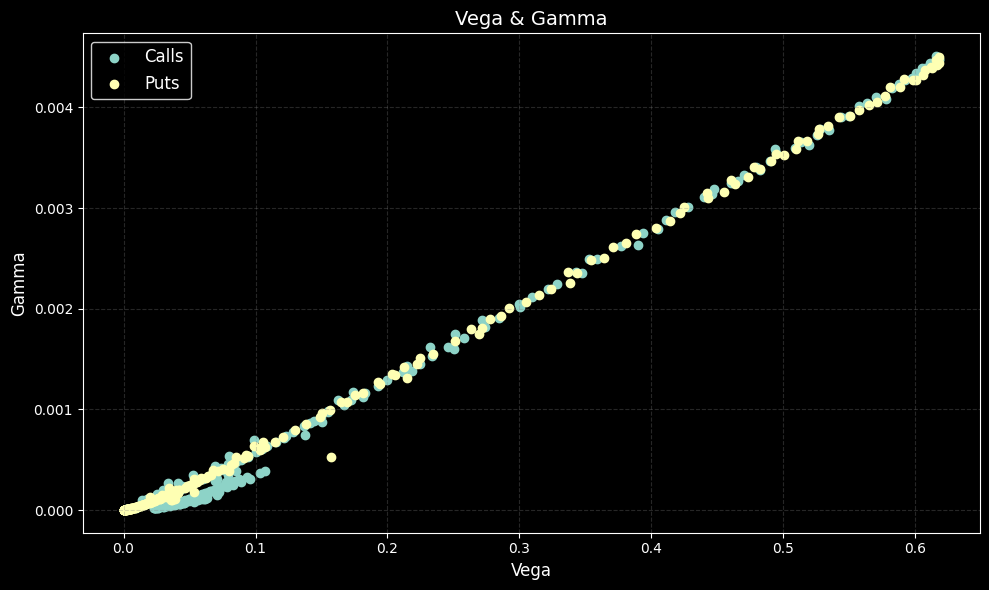

In [39]:
# Vega and Gamma
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.scatter(call['Vega'], call['Gamma'], label='Calls')
plt.scatter(put['Vega'], put['Gamma'], label='Puts')
plt.xlabel('Vega', fontsize=12, color='white')
plt.ylabel('Gamma', fontsize=12, color='white')
plt.title('Vega & Gamma', fontsize=14, color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()

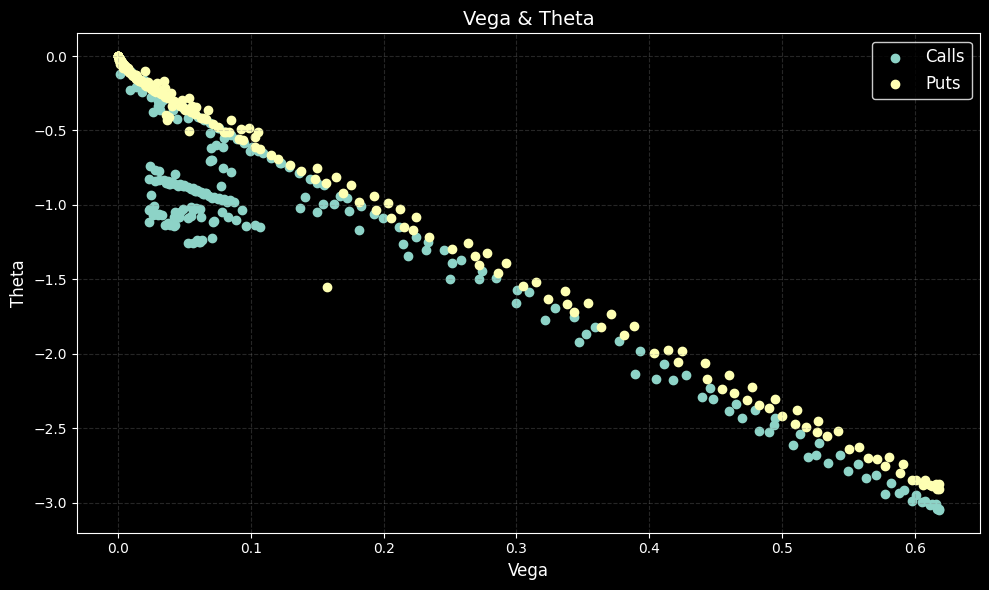

In [40]:
# Vega and Theta
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.scatter(call['Vega'], call['Theta'], label='Calls')
plt.scatter(put['Vega'], put['Theta'], label='Puts')
plt.xlabel('Vega', fontsize=12, color='white')
plt.ylabel('Theta', fontsize=12, color='white')
plt.title('Vega & Theta', fontsize=14, color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()

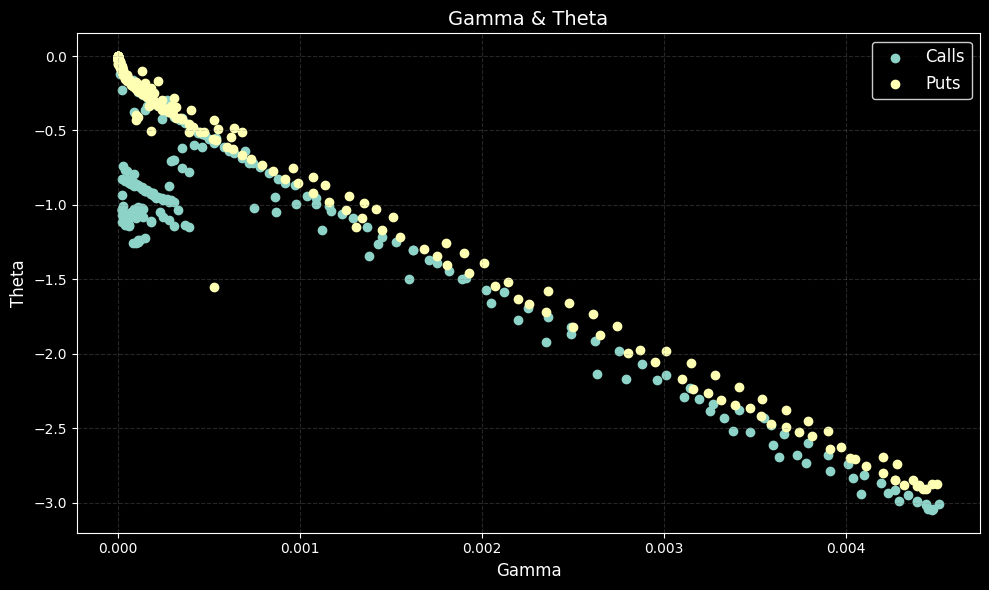

In [41]:
# Gamma and Theta
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.scatter(call['Gamma'], call['Theta'], label='Calls')
plt.scatter(put['Gamma'], put['Theta'], label='Puts')
plt.xlabel('Gamma', fontsize=12, color='white')
plt.ylabel('Theta', fontsize=12, color='white')
plt.title('Gamma & Theta', fontsize=14, color='white')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.legend(loc='best', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()

### **Implied Volatility**


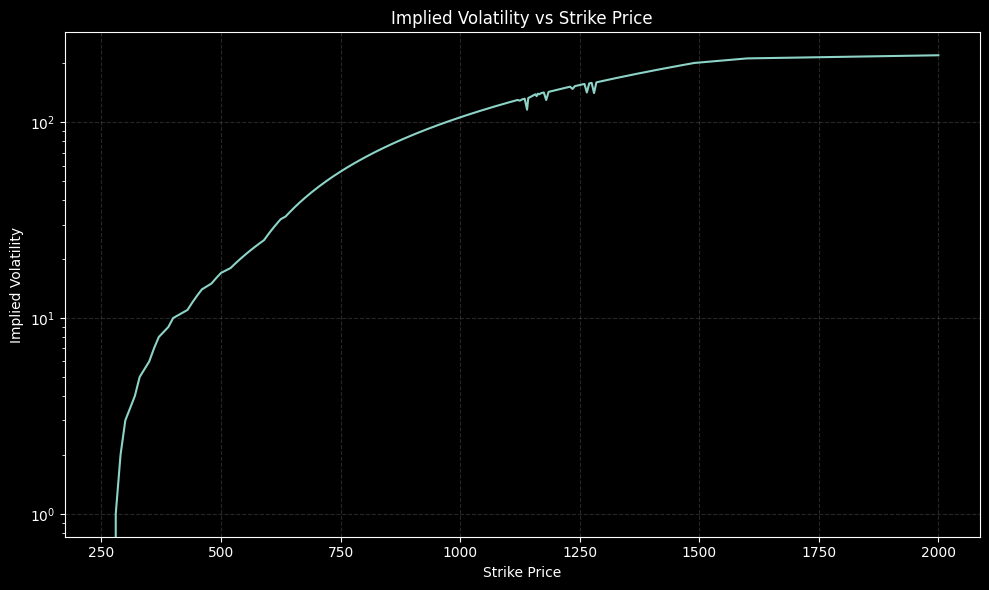

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(call['Strike'], call['IV'])
plt.yscale('log')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs Strike Price')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()
plt.show()

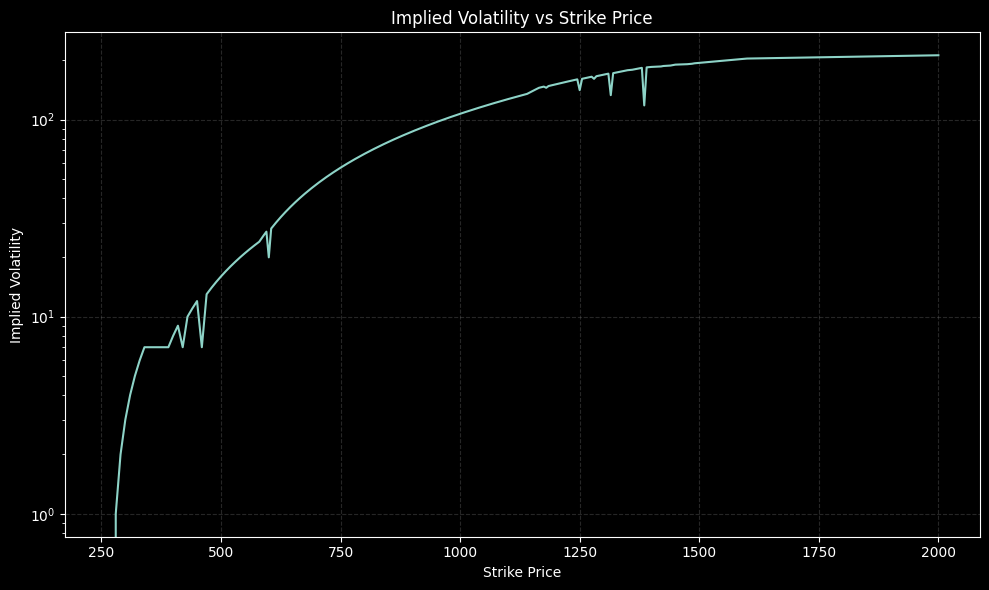

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(put['Strike'], put['IV'])
plt.yscale('log')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs Strike Price')
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.tight_layout()
plt.show()